<a href="https://colab.research.google.com/github/PARTH-1712/Steane-CSS-Code-Implementation/blob/main/Steane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit


In [ ]:
!pip install pylatexenc



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=d9c56901755bd39fa8124991b0cfc752abf732087c7e736a049d7449e6db0873
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
!pip install qiskit-aer


In [ ]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import math


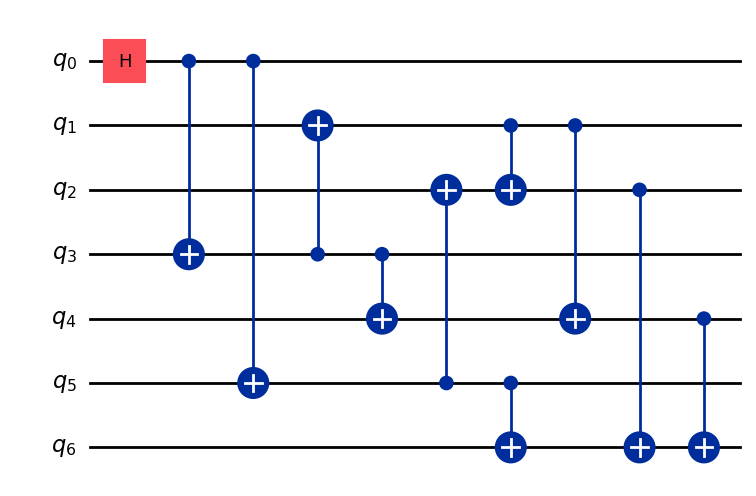

In [ ]:
# Helper function to create the Steane code circuit
def create_steane_code():
    qc = QuantumCircuit(7)  # Create a quantum circuit with 7 qubits for the Steane code.

    # Encode logical |0> state using CNOT gates.
    qc.h(0)  # Apply Hadamard gate to qubit 0, putting it in a superposition state.
    qc.cx(0, 3)  # Apply CNOT gate with control qubit 0 and target qubit 3.
    qc.cx(0, 5)  # Apply CNOT gate with control qubit 0 and target qubit 5.
    qc.cx(3, 1)  # Apply CNOT gate with control qubit 3 and target qubit 1.
    qc.cx(3, 4)  # Apply CNOT gate with control qubit 3 and target qubit 4.
    qc.cx(5, 2)  # Apply CNOT gate with control qubit 5 and target qubit 2.
    qc.cx(5, 6)  # Apply CNOT gate with control qubit 5 and target qubit 6.
    qc.cx(1, 2)  # Apply CNOT gate with control qubit 1 and target qubit 2.
    qc.cx(1, 4)  # Apply CNOT gate with control qubit 1 and target qubit 4.
    qc.cx(2, 6)  # Apply CNOT gate with control qubit 2 and target qubit 6.
    qc.cx(4, 6)  # Apply CNOT gate with control qubit 4 and target qubit 6.

    return qc  # Return the quantum circuit encoding the logical |0> state.

# Create the Steane code quantum circuit
steane_qc = create_steane_code()
steane_qc.draw('mpl')  # Draw the circuit using Matplotlib for visualization.


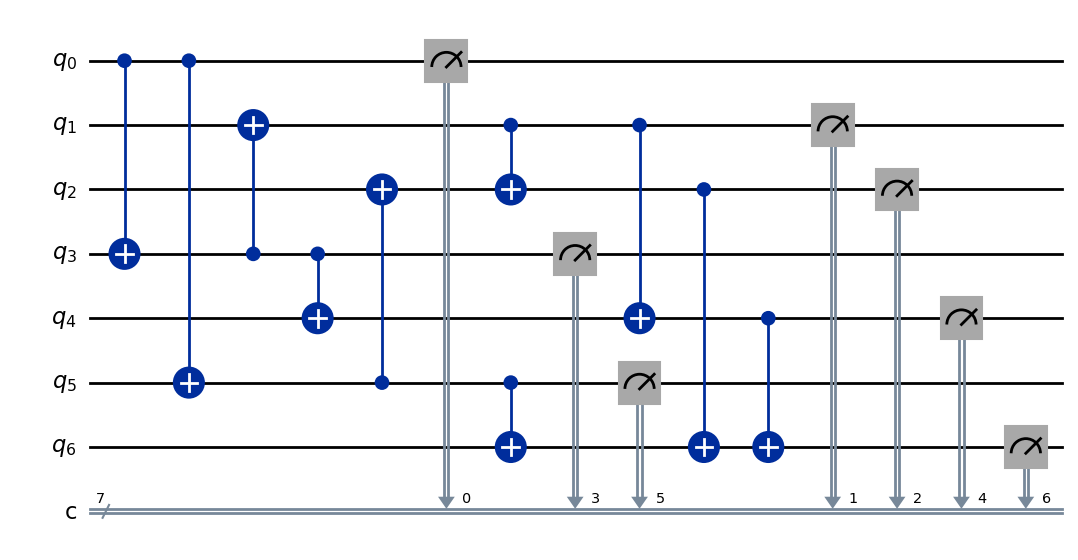

In [ ]:
# Function to measure the syndrome
def measure_syndrome(qc, q, c):
    # Apply the same CNOT operations used in encoding to measure the syndrome.
    qc.cx(q[0], q[3])  # CNOT between qubits 0 and 3.
    qc.cx(q[0], q[5])  # CNOT between qubits 0 and 5.
    qc.cx(q[3], q[1])  # CNOT between qubits 3 and 1.
    qc.cx(q[3], q[4])  # CNOT between qubits 3 and 4.
    qc.cx(q[5], q[2])  # CNOT between qubits 5 and 2.
    qc.cx(q[5], q[6])  # CNOT between qubits 5 and 6.
    qc.cx(q[1], q[2])  # CNOT between qubits 1 and 2.
    qc.cx(q[1], q[4])  # CNOT between qubits 1 and 4.
    qc.cx(q[2], q[6])  # CNOT between qubits 2 and 6.
    qc.cx(q[4], q[6])  # CNOT between qubits 4 and 6.
    qc.measure(q, c)  # Measure all qubits and store the results in the classical registers.

# Initialize a quantum circuit for syndrome measurement with 7 qubits and 7 classical bits.
syndrome_qc = QuantumCircuit(7, 7)
measure_syndrome(syndrome_qc, range(7), range(7))  # Apply the syndrome measurement to the circuit.
syndrome_qc.draw('mpl')  # Draw the circuit using Matplotlib for visualization.


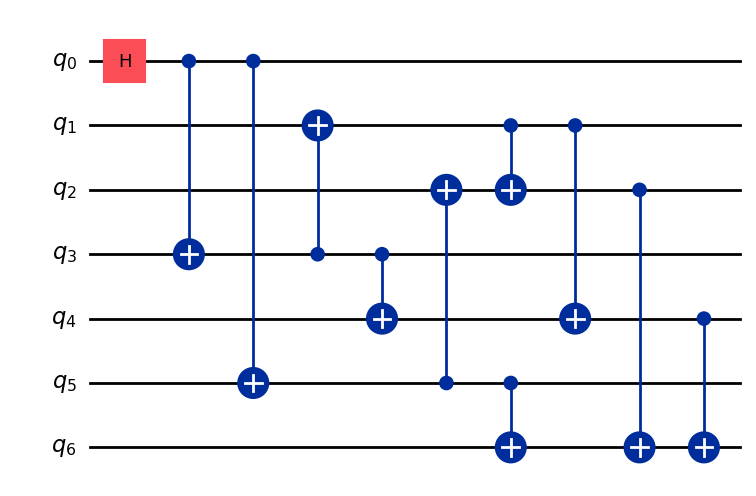

In [ ]:
# Function to correct errors based on the measured syndrome
def correct_errors(qc, syndrome):
    # Implement error correction based on the syndrome.
    # This is simplified for illustration purposes.
    if syndrome == '0000001':  # If the syndrome corresponds to an error in qubit 0,
        qc.x(0)  # Apply an X gate (bit-flip) to qubit 0.
    elif syndrome == '0000010':  # If the syndrome corresponds to an error in qubit 1,
        qc.x(1)  # Apply an X gate (bit-flip) to qubit 1.
    # More syndromes and corrections go here.

# Example usage:
simulator = AerSimulator()  # Instantiate the AerSimulator

# Run the syndrome measurement circuit on the simulator
result = simulator.run(syndrome_qc, shots=1, memory=True).result()
syndrome = list(result.get_memory())[0]  # Get the measured syndrome from the result.

# Correct the errors in the Steane code circuit based on the syndrome
correct_errors(steane_qc, syndrome)

# Visualize the final circuit with error correction applied
steane_qc.draw('mpl')
